In [1]:
# PACKAGE LOADING
import pandas as pd
import os
import numpy as np
import pandas as pd
import collections
import scipy.stats as st
import seaborn as sns
import collections
import matplotlib.pyplot as plt

#DISPLAY ALL THE COLUMNS IN CASE 
pd.set_option('display.max_columns', None)

#SET THE PATH TO LOCAL
os.chdir('/Users/changxuezhi/Desktop/566/')

In [62]:
fillMSFT=pd.read_csv('/Users/changxuezhi/Desktop/566/backtestingResults_SPY2COMP_BACK_T3MSFT_2020-12-19_202026_start_10-02-2019_end_10-31-2019_fill.csv')
orderMSFT= pd.read_csv('/Users/changxuezhi/Desktop/566/backtestingResults_SPY2COMP_BACK_T3MSFT_2020-12-19_202026_start_10-02-2019_end_10-31-2019_order.csv')
pnlMSFT= pd.read_csv('/Users/changxuezhi/Desktop/566/backtestingResults_SPY2COMP_BACK_T3MSFT_2020-12-19_202026_start_10-02-2019_end_10-31-2019_pnl.csv')

fillAAPL=pd.read_csv('/Users/changxuezhi/Desktop/566/backtestingResults_SPY2COMP_BACK_T3AAPL_2020-12-19_202003_start_10-04-2019_end_10-31-2019_fill.csv')
orderAAPL= pd.read_csv('/Users/changxuezhi/Desktop/566/backtestingResults_SPY2COMP_BACK_T3AAPL_2020-12-19_202003_start_10-04-2019_end_10-31-2019_order.csv')
pnlAAPL= pd.read_csv('/Users/changxuezhi/Desktop/566/backtestingResults_SPY2COMP_BACK_T3AAPL_2020-12-19_202003_start_10-04-2019_end_10-31-2019_pnl.csv')

fillINTC=pd.read_csv('/Users/changxuezhi/Desktop/566/backtestingResults_SPY2COMP_BACK_T3INTC_2020-12-19_201938_start_10-01-2019_end_10-31-2019_fill.csv')
orderINTC= pd.read_csv('/Users/changxuezhi/Desktop/566/backtestingResults_SPY2COMP_BACK_T3INTC_2020-12-19_201938_start_10-01-2019_end_10-31-2019_order.csv')
pnlINTC= pd.read_csv('/Users/changxuezhi/Desktop/566/backtestingResults_SPY2COMP_BACK_T3INTC_2020-12-19_201938_start_10-01-2019_end_10-31-2019_pnl.csv')

fillJPM=pd.read_csv('/Users/changxuezhi/Desktop/566/backtestingResults_SPY2COMP_BACK_T3JPM_2020-12-19_201910_start_10-03-2019_end_10-31-2019_fill.csv')
orderJPM= pd.read_csv('/Users/changxuezhi/Desktop/566/backtestingResults_SPY2COMP_BACK_T3JPM_2020-12-19_201910_start_10-03-2019_end_10-31-2019_order.csv')
pnlJPM= pd.read_csv('/Users/changxuezhi/Desktop/566/backtestingResults_SPY2COMP_BACK_T3JPM_2020-12-19_201910_start_10-03-2019_end_10-31-2019_pnl.csv')

In [63]:
#calculate msft cumulative return
fillMSFT['buy']=0
fillMSFT['sell']=0
for i in range(len(fillMSFT)):
    if fillMSFT['Quantity'].loc[i]>0:
        fillMSFT['buy'].loc[i]=1
    if fillMSFT['Quantity'].loc[i]<0:
        fillMSFT['sell'].loc[i]=-1
fillMSFT

,StrategyName,TradeTime,Symbol,Quantity,Price,ExecutionCost,LiquidityAction,LiquidityCode,RawLiquidity,Account,Trader,MarketCenter,OrderID,ExecID,TransactionType,buy,sell
0,T3MSFT,2019-Oct-02 13:30:01.792000,MSFT,95,136.29,0.114000,REMOVED,0,NaN,SIM-1001-101,dlariviere,IEX,361425793262260,NaN,FILL,1,0
1,T3MSFT,2019-Oct-02 13:30:20.402000,MSFT,100,136.09,0.120000,REMOVED,0,NaN,SIM-1001-101,dlariviere,IEX,361425793262262,NaN,FILL,1,0
2,T3MSFT,2019-Oct-02 13:30:43.326000,MSFT,-195,135.90,0.827611,REMOVED,0,NaN,SIM-1001-101,dlariviere,IEX,361425793262263,NaN,FILL,0,-1
3,T3MSFT,2019-Oct-02 13:31:24.857000,MSFT,100,136.16,0.120000,REMOVED,0,NaN,SIM-1001-101,dlariviere,IEX,361425793262264,NaN,FILL,1,0
4,T3MSFT,2019-Oct-02 13:31:34.810000,MSFT,-100,136.13,0.424931,REMOVED,0,NaN,SIM-1001-101,dlariviere,IEX,361425793262265,NaN,FILL,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789,T3MSFT,2019-Oct-31 19:06:32.118000,MSFT,35,143.36,0.042000,REMOVED,0,NaN,SIM-1001-101,dlariviere,IEX,361425793266510,NaN,FILL,1,0
2790,T3MSFT,2019-Oct-31 19:15:06.285000,MSFT,-35,143.32,0.154363,REMOVED,0,NaN,SIM-1001-101,dlariviere,IEX,361425793266513,NaN,FILL,0,-1
2791,T3MSFT,2019-Oct-31 19:15:09.902000,MSFT,30,143.30,0.036000,REMOVED,0,NaN,SIM-1001-101,dlariviere,IEX,361425793266514,NaN,FILL,1,0
2792,T3MSFT,2019-Oct-31 19:15:30.621000,MSFT,-30,143.30,0.132298,REMOVED,0,NaN,SIM-1001-101,dlariviere,IEX,361425793266515,NaN,FILL,0,-1


In [64]:
fillMSFT['buy_cost']=0
fillMSFT['sell_gain']=0

gain=[]
for i in range(len(fillMSFT)):
        if fillMSFT['buy'].loc[i]>0:
            gain.append(-fillMSFT['Quantity'].loc[i]*fillMSFT['Price'].loc[i]-fillMSFT['ExecutionCost'].loc[i])
        else:
            gain.append(0)
        
fillMSFT['buy_cost']=gain


gain=[]
for i in range(len(fillMSFT)):
        if fillMSFT['sell'].loc[i]<0:
            gain.append(-fillMSFT['Quantity'].loc[i]*fillMSFT['Price'].loc[i]-fillMSFT['ExecutionCost'].loc[i])
        else:
            gain.append(0)

fillMSFT['sell_gain']=gain



In [65]:
pnlMSFT['Cumulative PnL'].loc[0]=0
pnlMSFT.head(30)
pnlMSFT['simplereturn']=pnlMSFT['Cumulative PnL']-pnlMSFT['Cumulative PnL'].shift(1)
pnlMSFT

,Name,Time,Cumulative PnL,simplereturn
0,T3MSFT,2019-Oct-02 13:30:15.903000,0.000000,NaN
1,T3MSFT,2019-Oct-02 13:31:24.739000,-57.111611,-57.111611
2,T3MSFT,2019-Oct-02 13:32:34.898000,-66.201317,-9.089706
3,T3MSFT,2019-Oct-02 13:33:40.852000,-61.758014,4.443303
4,T3MSFT,2019-Oct-02 13:34:49.901000,-37.941673,23.816341
...,...,...,...,...
7121,T3MSFT,2019-Oct-31 20:36:31.548000,7472.229969,0.000000
7122,T3MSFT,2019-Oct-31 20:39:51.723000,7472.229969,0.000000
7123,T3MSFT,2019-Oct-31 20:42:02.941000,7472.229969,0.000000
7124,T3MSFT,2019-Oct-31 20:45:02.931000,7472.229969,0.000000


In [66]:
#the profit and loss is depends on how much you buy and how much you invest
#since in 10 30 their is 5204 filled traded.
#we can plot the cumulative return by

total_invest=[]
total_cost=[]
for i in range(len(pnlMSFT)):
    if i ==0:
        total_cost.append(sum(fillMSFT[(fillMSFT['TradeTime']<=pnlMSFT['Time'].loc[i])].buy_cost*(-1)))
  
    else:
        
        total_cost.append(sum(fillMSFT[(fillMSFT['TradeTime']<=pnlMSFT['Time'].loc[i])&(fillMSFT['TradeTime']>pnlMSFT['Time'].loc[i-1])].buy_cost*(-1)))
    #total_cost.append(sum(fillMSFT[fillMSFT['TradeTime']<=pnlMSFT['Time'].loc[i]].ExecutionCost))

pnlMSFT['total_cost']=total_cost
#pnlMSFT['cumu_return_percentage']=pnlMSFT['Cumulative PnL']/(pnlMSFT['total_invest']+pnlMSFT['total_cost'])
#
pnlMSFT

,Name,Time,Cumulative PnL,simplereturn,total_cost
0,T3MSFT,2019-Oct-02 13:30:15.903000,0.000000,NaN,12947.664
1,T3MSFT,2019-Oct-02 13:31:24.739000,-57.111611,-57.111611,13609.120
2,T3MSFT,2019-Oct-02 13:32:34.898000,-66.201317,-9.089706,27227.240
3,T3MSFT,2019-Oct-02 13:33:40.852000,-61.758014,4.443303,29207.058
4,T3MSFT,2019-Oct-02 13:34:49.901000,-37.941673,23.816341,13575.120
...,...,...,...,...,...
7121,T3MSFT,2019-Oct-31 20:36:31.548000,7472.229969,0.000000,0.000
7122,T3MSFT,2019-Oct-31 20:39:51.723000,7472.229969,0.000000,0.000
7123,T3MSFT,2019-Oct-31 20:42:02.941000,7472.229969,0.000000,0.000
7124,T3MSFT,2019-Oct-31 20:45:02.931000,7472.229969,0.000000,0.000


In [68]:
pnlMSFT['simplerate']=0
for i in range(len(pnlMSFT)):
    if i ==0:
           pnlMSFT['simplerate'].loc[i]=0
    if i ==1:
           pnlMSFT['simplerate'].loc[i]=pnlMSFT['simplereturn'].loc[i]/(pnlMSFT['total_cost'].loc[i]+pnlMSFT['total_cost'].loc[i-1])  
    else:
           pnlMSFT['simplerate'].loc[i]=pnlMSFT['simplereturn'].loc[i]/(pnlMSFT['total_cost'].loc[i])  

/Users/changxuezhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/changxuezhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


In [98]:
#pnlMSFT[(pnlMSFT['simplerate']>=0)& (pnlMSFT['simplerate']<=0)]

df=pnlMSFT
#df#df = df.replace([np.inf, -np.inf], np.nan, inplace=True) 
df.replace([np.inf, -np.inf], np.nan, inplace=True) 
  
# Dropping all the rows with nan values 
df.dropna(inplace=True) 
  
# Printing df 
df
# Dropping all the rows with nan values 
#df.dropna(inplace=True) 


,Name,Time,Cumulative PnL,simplereturn,total_cost,simplerate,cumulative
1,T3MSFT,2019-Oct-02 13:31:24.739000,-57.111611,-57.111611,13609.1200,-0.002151,0.997849
2,T3MSFT,2019-Oct-02 13:32:34.898000,-66.201317,-9.089706,27227.2400,-0.000334,0.997516
3,T3MSFT,2019-Oct-02 13:33:40.852000,-61.758014,4.443303,29207.0580,0.000152,0.997668
4,T3MSFT,2019-Oct-02 13:34:49.901000,-37.941673,23.816341,13575.1200,0.001754,0.999418
5,T3MSFT,2019-Oct-02 13:35:53.505000,-38.486291,-0.544618,13552.1200,-0.000040,0.999378
...,...,...,...,...,...,...,...
7052,T3MSFT,2019-Oct-31 18:49:21.200000,7467.190047,7.880000,14314.1200,0.000551,39.695173
7062,T3MSFT,2019-Oct-31 19:01:08.650000,7474.093077,0.344000,716.1560,0.000480,39.714241
7068,T3MSFT,2019-Oct-31 19:07:32.834000,7473.454029,-0.567000,5017.6420,-0.000113,39.709753
7075,T3MSFT,2019-Oct-31 19:15:28.412000,7473.288666,0.884637,4299.0360,0.000206,39.717924


In [99]:
df.simplerate.describe()

count    1218.000000
mean        0.016276
std         0.547587
min        -0.075943
25%        -0.000112
50%         0.000034
75%         0.000339
max        19.109439
Name: simplerate, dtype: float64

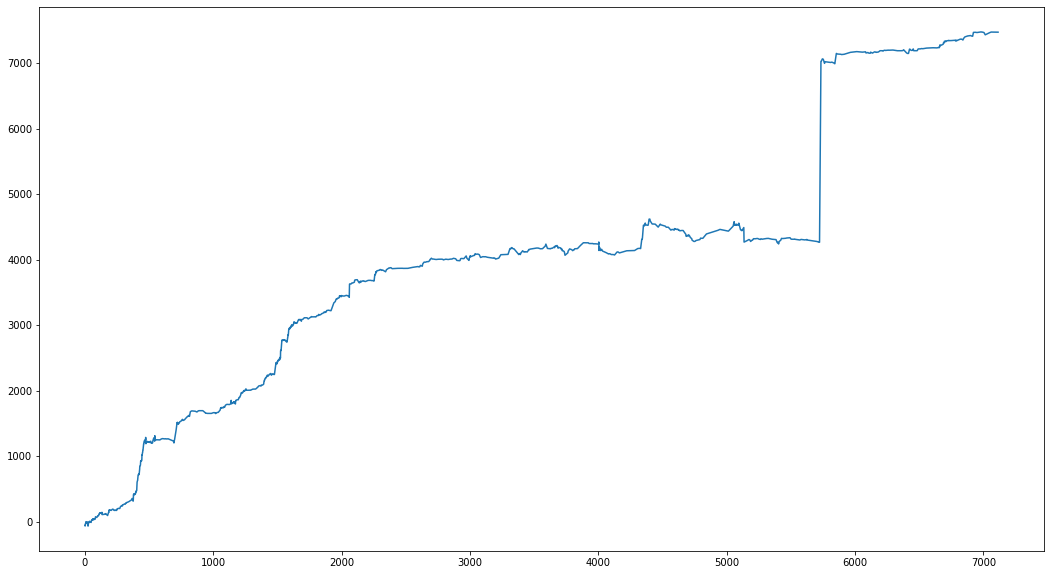

In [100]:
#see the ourliers of the df simple rate
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (18,10))
plt.plot(df['Cumulative PnL'])
#we notice there is extreme profit from oct25 to oct 28
#it was triggered by one extreme return trade, which is an outlier of our dataset


In [102]:
df=df[df['simplerate']<=10]

In [104]:
df['cumulative']=(1 + df['simplerate']).cumprod()
df

/Users/changxuezhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Time,Cumulative PnL,simplereturn,total_cost,simplerate,cumulative
1,T3MSFT,2019-Oct-02 13:31:24.739000,-57.111611,-57.111611,13609.1200,-0.002151,0.997849
2,T3MSFT,2019-Oct-02 13:32:34.898000,-66.201317,-9.089706,27227.2400,-0.000334,0.997516
3,T3MSFT,2019-Oct-02 13:33:40.852000,-61.758014,4.443303,29207.0580,0.000152,0.997668
4,T3MSFT,2019-Oct-02 13:34:49.901000,-37.941673,23.816341,13575.1200,0.001754,0.999418
5,T3MSFT,2019-Oct-02 13:35:53.505000,-38.486291,-0.544618,13552.1200,-0.000040,0.999378
...,...,...,...,...,...,...,...
7052,T3MSFT,2019-Oct-31 18:49:21.200000,7467.190047,7.880000,14314.1200,0.000551,1.973957
7062,T3MSFT,2019-Oct-31 19:01:08.650000,7474.093077,0.344000,716.1560,0.000480,1.974905
7068,T3MSFT,2019-Oct-31 19:07:32.834000,7473.454029,-0.567000,5017.6420,-0.000113,1.974682
7075,T3MSFT,2019-Oct-31 19:15:28.412000,7473.288666,0.884637,4299.0360,0.000206,1.975089


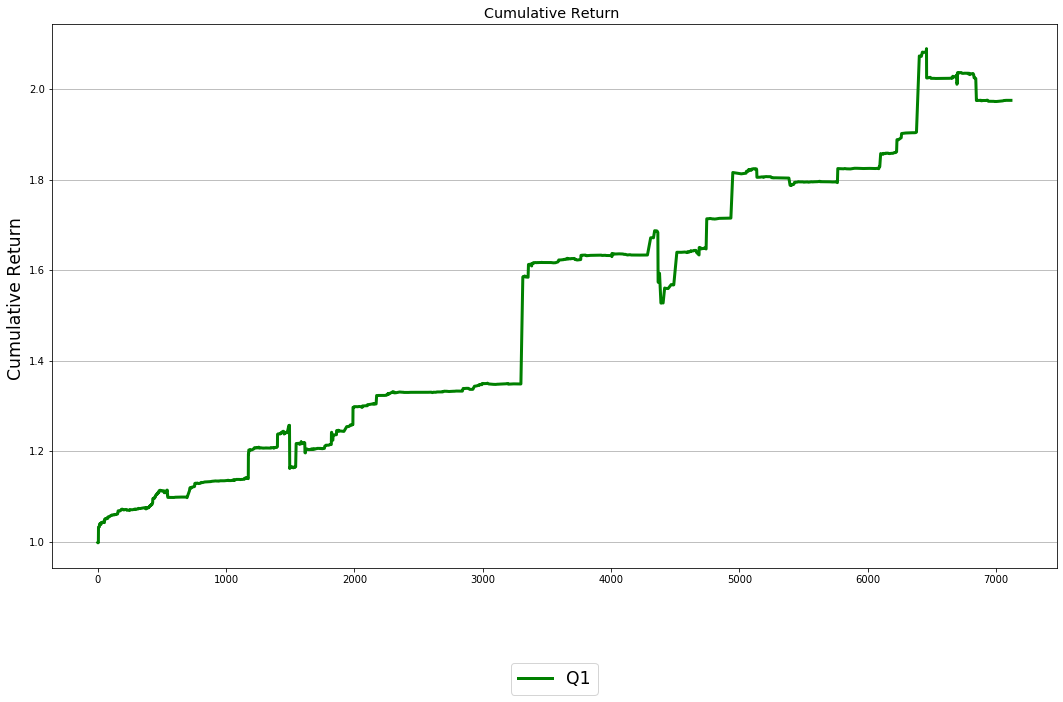

In [105]:


plt.figure(figsize=(18,10))
plt.ylabel('Cumulative Return ',fontsize="xx-large")
plt.title('Cumulative Return ',fontsize="x-large")
plt.gca().yaxis.grid(True)
#plt.plot(pnlMSFT['Cumulative PnL'],color='red',label="Q1",lw=3)
plt.plot(df.cumulative,color='green',label="Q1",lw=3)
#[df['Time']>'2019-Oct-28']

plt.legend(fontsize="xx-large",loc='lower center',bbox_to_anchor=(0.5, -0.25), ncol=3)



In [111]:
cumure=df[-1:]
cr=cumure[[ 'cumulative']]-1
cr['Annualized']=(cr['cumulative']+1)**(12)-1#this is only calculated using 1 days return, has large bias
cr['vol']=np.sqrt(df['simplerate'].var()*12)#yearly

cr['Sharpe']=cr['Annualized']/cr['vol']
df['downside_returns'] = 0

rfr = 0
target = 0
df.loc[df['simplerate'] < target, 'downside_returns'] = df['simplerate']**2

down_stdev = np.sqrt(df['downside_returns'].mean()*12)
cr['Sortino']=cr['Annualized']/down_stdev

cr['T-Stat']=st.ttest_1samp(df['simplerate'],0).statistic
cr['P-Value']= st.ttest_1samp(df['simplerate'],0).pvalue
cr       

/Users/changxuezhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,cumulative,Annualized,vol,Sharpe,Sortino,T-Stat,P-Value
7115,0.975072,3522.670644,0.026415,133357.347682,296663.346611,2.685665,0.007337
